# 用tensor的backward编写神经网络训练程序，预测线性函数的数据


In [1]:
#导入需要使用的库
import numpy as np
import pandas as pd #读取csv文件的库
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# 让输出的图形直接在Notebook中显示
%matplotlib inline

## 1.读取数据

In [2]:
#读取数据到内存中，rides为一个dataframe对象
# 这个数据是由此代码生成的D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\gen-data.py
# 此代码可以显示此数据D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\myc3\show-data.py
data_path = 'liner-data1.csv'
rides = pd.read_csv(data_path)

print(rides.shape)
rowCount = rides.shape[0]
#看看数据长什么样子
rides


(200, 2)


,x,y
0,1.0,9.153159
1,2.0,-10.511052
2,3.0,-1.507276
3,4.0,-31.165224
4,5.0,-5.947754
...,...,...
195,196.0,8.263368
196,197.0,10.041613
197,198.0,18.278316
198,199.0,-2.559620


## 2.将数据转成tensor数组

In [3]:
xx_arr=rides.drop(['y'], axis=1).values
# print(xx)
yy_arr=rides.drop(['x'], axis=1).values
# print(yy)

# 输入数据是1-200，将它变成0到1之间的数
# 如果没有这一步，则结果不对，得到的参数是一条水平的线
xx = torch.tensor(xx_arr/rowCount, dtype = torch.float, requires_grad = True)

yy = torch.tensor(yy_arr, dtype = torch.float, requires_grad = True)
print(xx.shape)
# print(xx)

torch.Size([200, 1])


In [4]:
x = xx.view(rowCount, -1)
# print("x2:",x)

## 2.构建神经网络

In [5]:
# 程序有错误，每次运行结果都不一样
# 给一些固定的初始值作为参数，保证每次调试结果都一样，方便找出问题。
initWeight=3.9276

initBiase=-1.1799

initWeight2=9.6974

# 设置隐含层神经元的数量
sz = 1

# 初始化所有神经网络的权重（weights）和阈值（biases）
weights = torch.randn((1, sz), dtype = torch.double, requires_grad = True) #1*10的输入到隐含层的权重矩阵
weights = weights.new_full((1, sz),initWeight, requires_grad = True)
print("weights:",weights)
biases = torch.randn(sz, dtype = torch.double, requires_grad = True) #尺度为10的隐含层节点偏置向量
biases = biases.new_full((1,),initBiase, requires_grad = True)
print("biases:",biases)
weights2 = torch.randn((sz, 1), dtype = torch.double, requires_grad = True) #10*1的隐含到输出层权重矩阵
weights2= weights2.new_full((sz,1),initWeight2, requires_grad = True)
print("weights2:",weights2)
learning_rate = 0.001 #设置学习率
losses = []

# 将 x 转换为(200,1)的维度，以便与维度为(1,10)的weights矩阵相乘
x = xx.view(rowCount, -1)
# print("x2:",x)
# 将 y 转换为(200,1)的维度
y = yy.view(rowCount, -1)
# print("y2:",y)




weights: tensor([[3.9276]], dtype=torch.float64, requires_grad=True)
biases: tensor([-1.1799], dtype=torch.float64, requires_grad=True)
weights2: tensor([[9.6974]], dtype=torch.float64, requires_grad=True)


## 3.训练

In [6]:
for i in range(100000):
    # 从输入层到隐含层的计算
    # print("biases:",biases)
    # print("x * weights:",x * weights)
    # print("x * weights+ biases:",x * weights+ biases)
    hidden = x * weights + biases
    
    # 将sigmoid函数作用在隐含层的每一个神经元上
    hidden = torch.sigmoid(hidden)
    # hidden此时有50行，每行代表一条训练数据，10列，每列是神经元的值  
    # print("hidden:",hidden)
    #print(hidden.size())
    # 隐含层输出到输出层，计算得到最终预测
    predictions = hidden.mm(weights2)#
    # predictions此时有50行，1列，即最终结果     
    #print(predictions.size())
    # 通过与标签数据y比较，计算均方误差
    loss = torch.mean((predictions - y) ** 2) 
    #print(loss.size())
    losses.append(loss.data.numpy())
    
    # 每隔10000个周期打印一下损失函数数值
    if i % 10000 == 0:
        print('loss:', loss)
        
    #对损失函数进行梯度反传
    loss.backward()
    
    #利用上一步计算中得到的weights，biases等梯度信息更新weights或biases中的data数值
    weights.data.add_(- learning_rate * weights.grad.data)  
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    # 清空所有变量的梯度值。
    # 因为pytorch中backward一次梯度信息会自动累加到各个变量上，因此需要清空，否则下一次迭代会累加，造成很大的偏差
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
print(weights)
print(weights2)
print(biases)




loss: tensor(137.4312, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4244, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4218, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4216, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4216, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4216, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4216, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4216, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4216, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(103.4216, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([[7.9432]], dtype=torch.float64, requires_grad=True)
tensor([[18.6740]], dtype=torch.float64, requires_grad=True)
tensor([-3.7736], dtype=torch.float64, requires_grad=True)


## 4.图形展示损失值

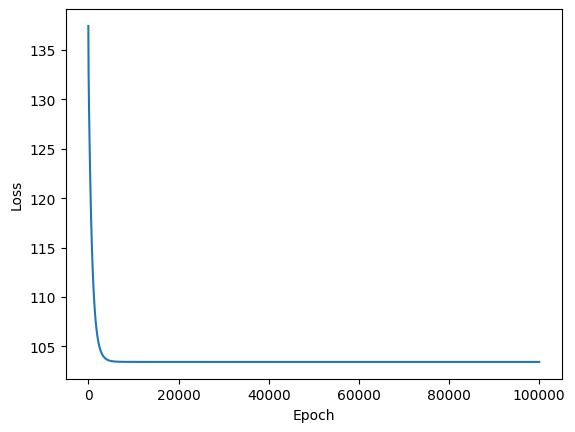

In [7]:
# 打印误差曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## 5.原始数据的图像和预测数据的图像

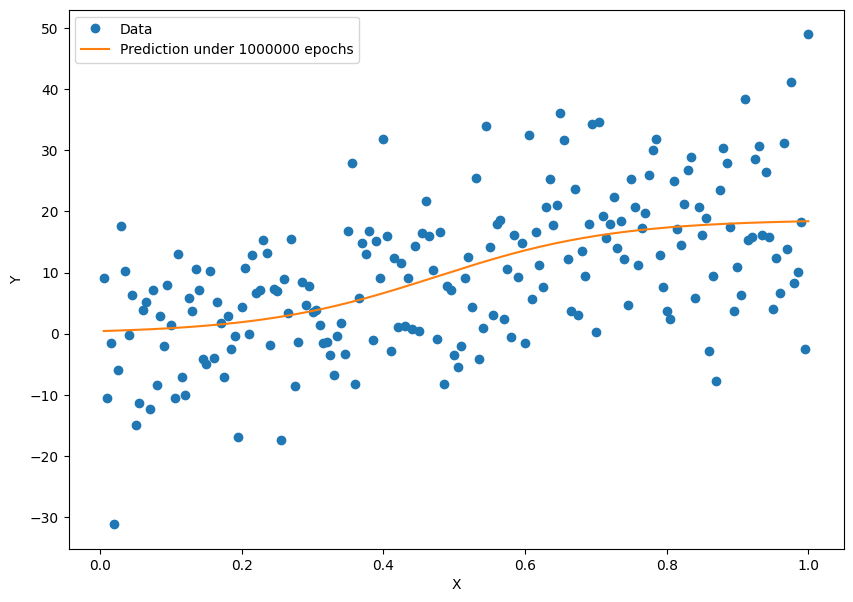

In [8]:
x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据

yplot, = plt.plot(x_data, predictions
                  .data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction under 1000000 epochs']) #绘制图例
plt.show()

In [9]:

# tensor([[2.9068]], dtype=torch.float64, requires_grad=True)
# tensor([-1.4661], dtype=torch.float64, requires_grad=True)
# tensor([[9.7041]],
# 打印出预测的过程
myweight=7.9432
myweight2=18.6740

mybiase=-3.7736




# 获取张量的shape
dim0, dim1 = x.shape
print(x[0][0].item()*myweight)
print(x[0][0].item()*myweight+mybiase)

myHidden = x * myweight + mybiase
    
# 将sigmoid函数作用在隐含层的每一个神经元上
myHidden2 = torch.sigmoid(myHidden)

result = myHidden2*myweight2
# 遍历张量
for i in range(dim0):
    
    element = x[i][0]
    print('%.4f\t' % element.item(), end=' ')
    
    
    h1=myHidden[i][0]
    print('%.5f\t' % h1.item(), end=' ')
    
    h2=myHidden2[i][0]
    print('%.4f\t' % h2.item(), end=' ')
    
    r=result[i][0]
    print('%.4f\t' % r.item(), end=' ')
    
    p=predictions[i][0]
    print('%.4f\t' % p.item(), end=' ')
    print()


0.03971599911227822
-3.7338840008877217
0.0050	 -3.73388	 0.0233	 0.4359	 0.4359	 
0.0100	 -3.69417	 0.0243	 0.4531	 0.4531	 
0.0150	 -3.65445	 0.0252	 0.4710	 0.4710	 
0.0200	 -3.61474	 0.0262	 0.4896	 0.4896	 
0.0250	 -3.57502	 0.0273	 0.5089	 0.5089	 
0.0300	 -3.53530	 0.0283	 0.5289	 0.5290	 
0.0350	 -3.49559	 0.0294	 0.5497	 0.5498	 
0.0400	 -3.45587	 0.0306	 0.5713	 0.5713	 
0.0450	 -3.41616	 0.0318	 0.5937	 0.5938	 
0.0500	 -3.37644	 0.0330	 0.6170	 0.6170	 
0.0550	 -3.33672	 0.0343	 0.6411	 0.6412	 
0.0600	 -3.29701	 0.0357	 0.6662	 0.6662	 
0.0650	 -3.25729	 0.0371	 0.6922	 0.6922	 
0.0700	 -3.21758	 0.0385	 0.7191	 0.7192	 
0.0750	 -3.17786	 0.0400	 0.7471	 0.7471	 
0.0800	 -3.13814	 0.0416	 0.7761	 0.7761	 
0.0850	 -3.09843	 0.0432	 0.8062	 0.8062	 
0.0900	 -3.05871	 0.0448	 0.8374	 0.8374	 
0.0950	 -3.01900	 0.0466	 0.8697	 0.8698	 
0.1000	 -2.97928	 0.0484	 0.9033	 0.9033	 
0.1050	 -2.93956	 0.0502	 0.9380	 0.9381	 
0.1100	 -2.89985	 0.0522	 0.9741	 0.9741	 
0.1150	 -2.860

In [10]:


myx=20
print(myx,myweight,mybiase)
myHidden=myx*myweight+mybiase
print(myHidden)

20 7.9432 -3.7736
155.09040000000002


In [11]:
myHiddenSigmoid = torch.sigmoid(torch.tensor([myHidden]))
print(myHiddenSigmoid)

tensor([1.])


In [12]:
from math import exp
def mySigmoid(x):
    return 1 / (1+exp(-x))

In [13]:
mySigmoid(myHidden)

1.0